<a href="https://colab.research.google.com/github/vedmara/project/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [19]:
birddata=pd.read_csv("/content/drive/MyDrive/Springboard_Python/Bird.csv")
birddata.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [20]:
# Separate features (measurements) and target (bird type)
X = birddata.drop(columns=['type'])
y = birddata['type']

In [30]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Perform PCA
pca = PCA()
pca.fit(X_scaled)


PCA()

In [32]:
# Generate names for the principal components
pc_names = [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))]

In [33]:
# Calculate standard deviation, proportion of explained variance, and cumulative proportion
std_deviation = pca.explained_variance_
prop_var = pca.explained_variance_ratio_
cum_prop_var = prop_var.cumsum()

In [34]:
# Create a summary DataFrame
pca_summary = pd.DataFrame({'Standard Deviation': std_deviation,
                            'Proportion of Variance': prop_var,
                            'Cumulative Proportion': cum_prop_var}, index=pc_names)

In [35]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,8.938649,0.810637,0.810637
PC2,0.813337,0.073761,0.884398
PC3,0.537724,0.048766,0.933163
PC4,0.389146,0.035291,0.968454
PC5,0.097106,0.008806,0.977261
PC6,0.090551,0.008212,0.985473
PC7,0.070619,0.006404,0.991877
PC8,0.035905,0.003256,0.995133
PC9,0.028147,0.002553,0.997686
PC10,0.018395,0.001668,0.999354


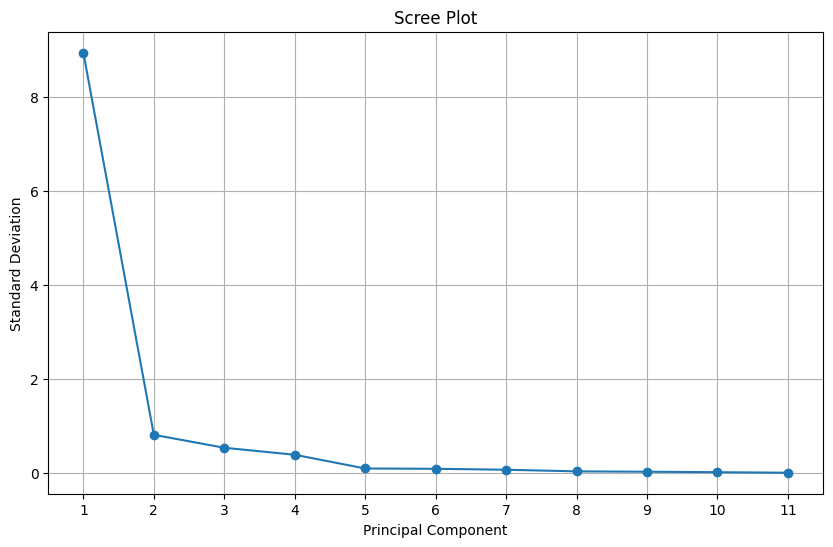

In [36]:
# Plot the principal components vs. variances
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(std_deviation) + 1), std_deviation, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Standard Deviation')
plt.title('Scree Plot')
plt.xticks(range(1, len(std_deviation) + 1))
plt.grid(True)
plt.show()

In [37]:
# Add bird type information to the scores
pca_scores_df = pd.DataFrame(pca.transform(X_scaled), columns=pc_names)
pca_scores_df['bird_type'] = y

In [38]:
# Find the average values of the new variables for each bird type
avg_pca_scores = pca_scores_df.groupby('bird_type').mean()

In [40]:
avg_pca_scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
bird_type,,,,,,,,,,,
P,-1.691456,0.076017,-0.239882,-0.006081,-0.015441,-0.021760,-0.108043,-0.036428,-0.000047,-0.005211,-0.011394
R,2.321133,0.896633,-0.403222,-0.281285,-0.246875,-0.086010,-0.009556,0.058252,-0.100369,-0.015051,-0.010918
SO,-2.602650,0.539181,-0.309107,0.260692,0.117865,-0.020827,0.036813,0.017006,0.031786,0.004599,0.009924
SW,2.067336,-0.931191,0.304079,-0.033011,0.067911,-0.077688,0.031813,0.014243,0.034307,0.011545,0.012468
T,0.161321,0.255339,-0.022184,-0.655208,-0.178218,0.011468,-0.308645,-0.151253,0.040884,-0.020367,-0.008985
W,0.501065,-0.166253,0.500570,0.004782,-0.093082,0.254467,0.053251,-0.026468,-0.063155,-0.008135,-0.023643


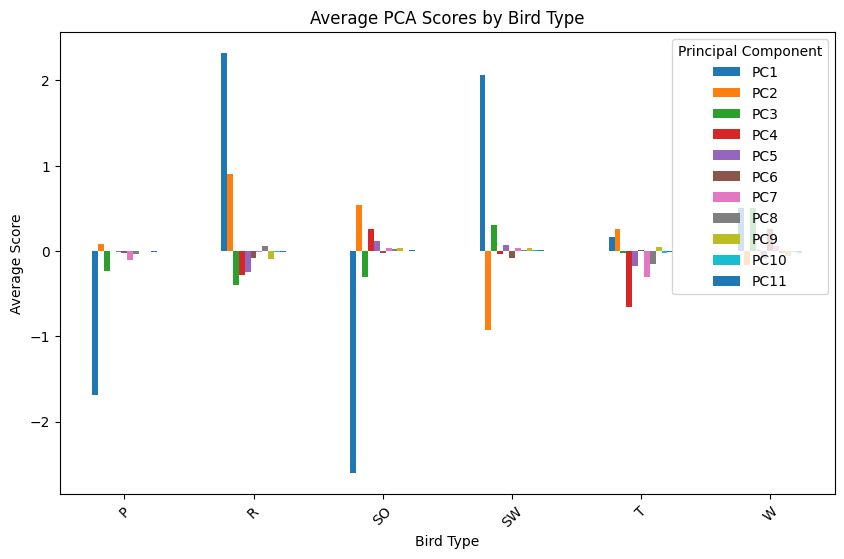

In [39]:
# Plot average scores for each bird type
avg_pca_scores.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Bird Type')
plt.ylabel('Average Score')
plt.title('Average PCA Scores by Bird Type')
plt.xticks(rotation=45)
plt.legend(title='Principal Component')
plt.show()